📦 Libraries imported successfully!
📅 Analysis date: 2025-07-16 16:36:56
📁 Created directory: data/raw
📁 Created directory: data/processed
📁 Created directory: data/external
📁 Created directory: visualizations
📁 Created directory: models
📁 Created directory: reports
🏢 CrowdStrike Company Information:
Company: CrowdStrike Holdings, Inc.
Sector: Technology
Industry: Software - Infrastructure
Market Cap: $117,258,723,328
Employees: 10,363
Website: https://www.crowdstrike.com

📈 Collecting Stock Price Data...
✅ Stock data collected: 1255 records
📊 Date range: 2020-07-17 to 2025-07-16
💰 Current price: $470.45
📈 52-week high: $517.98
📉 52-week low: $200.81


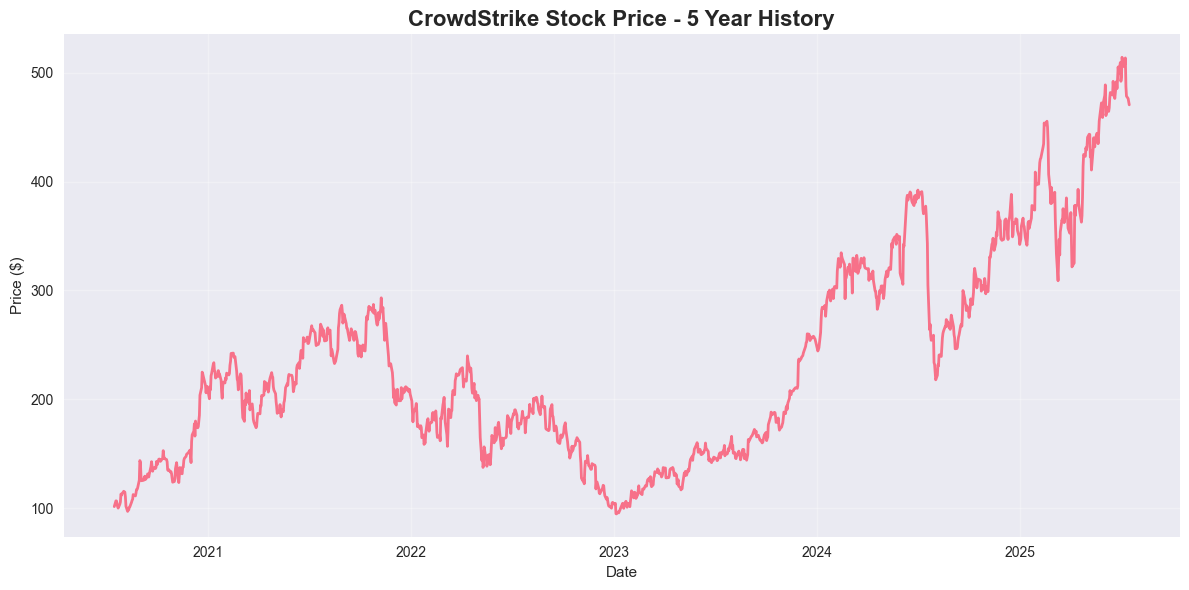


📊 Collecting Financial Statements...
✅ Income statement collected
✅ Balance sheet collected
✅ Cash flow statement collected

📋 Key Financial Metrics:
Market Cap: $117.3B
Enterprise Value: $123.2B
P/E Ratio: N/A
Forward P/E: 110.2
Price/Sales: 28.4
Price/Book: 34.0
Beta: 1.16
Revenue Growth: 19.8%
Gross Margin: 74.5%
Operating Margin: -10.7%
Profit Margin: -4.2%

✅ All data collection completed!
📁 Files saved to data/raw/ directory

⚠️ KEY EVENT ANALYSIS: July 2024 Global Outage
📉 Stock Impact Analysis:
   Pre-outage price: $343.05
   Post-outage low: $217.89
   Maximum decline: -36.5%
   Current recovery: 115.9%

📈 DATA COLLECTION SUMMARY
🏢 Company: CrowdStrike Holdings, Inc.
📅 Analysis Date: 2025-07-16
📊 Stock Records: 1255
💰 Current Price: $470.45
📈 Market Cap: $117.3B
📋 P/E Ratio: N/A
📈 Revenue Growth: 19.8%
🎯 Ready for financial analysis!

🚀 NEXT STEPS IN ANALYSIS:
1. ✅ Data Collection Complete
2. 📊 Financial Ratio Analysis
3. 📈 Revenue & Growth Analysis
4. 💰 Valuation Models (DCF

In [1]:
# CrowdStrike Financial Analysis - Data Collection
# Notebook: 01_data_collection.ipynb

# Cell 1: Setup and Imports
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📦 Libraries imported successfully!")
print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Cell 2: Create Directory Structure
def setup_project_structure():
    """Create necessary directories for the project"""
    directories = [
        'data/raw',
        'data/processed', 
        'data/external',
        'visualizations',
        'models',
        'reports'
    ]
    
    for directory in directories:
        os.makedirs(directory, exist_ok=True)
        print(f"📁 Created directory: {directory}")

setup_project_structure()

# Cell 3: Initialize CrowdStrike Data Collector
class CrowdStrikeAnalyzer:
    def __init__(self):
        self.ticker = "CRWD"
        self.company_name = "CrowdStrike Holdings, Inc."
        self.stock = yf.Ticker(self.ticker)
        
    def get_company_info(self):
        """Get basic company information"""
        info = self.stock.info
        
        key_info = {
            'Company': info.get('longName', 'N/A'),
            'Sector': info.get('sector', 'N/A'),
            'Industry': info.get('industry', 'N/A'),
            'Market Cap': f"${info.get('marketCap', 0):,.0f}" if info.get('marketCap') else 'N/A',
            'Employees': f"{info.get('fullTimeEmployees', 0):,}" if info.get('fullTimeEmployees') else 'N/A',
            'Website': info.get('website', 'N/A'),
            'Business Summary': info.get('longBusinessSummary', 'N/A')[:200] + "..."
        }
        
        return key_info

# Initialize analyzer
analyzer = CrowdStrikeAnalyzer()
company_info = analyzer.get_company_info()

print("🏢 CrowdStrike Company Information:")
print("=" * 50)
for key, value in company_info.items():
    if key != 'Business Summary':
        print(f"{key}: {value}")

# Cell 4: Collect Stock Price Data
print("\n📈 Collecting Stock Price Data...")

# Get historical data
hist_data = analyzer.stock.history(period="5y")
hist_data.to_csv('data/raw/stock_prices.csv')

print(f"✅ Stock data collected: {len(hist_data)} records")
print(f"📊 Date range: {hist_data.index.min().date()} to {hist_data.index.max().date()}")
print(f"💰 Current price: ${hist_data['Close'].iloc[-1]:.2f}")
print(f"📈 52-week high: ${hist_data['High'].rolling(252).max().iloc[-1]:.2f}")
print(f"📉 52-week low: ${hist_data['Low'].rolling(252).min().iloc[-1]:.2f}")

# Cell 5: Quick Price Visualization
plt.figure(figsize=(12, 6))
plt.plot(hist_data.index, hist_data['Close'], linewidth=2)
plt.title('CrowdStrike Stock Price - 5 Year History', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/stock_price_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 6: Collect Financial Statements
print("\n📊 Collecting Financial Statements...")

try:
    # Income Statement
    financials = analyzer.stock.financials
    financials.to_csv('data/raw/income_statement.csv')
    print("✅ Income statement collected")
    
    # Balance Sheet
    balance_sheet = analyzer.stock.balance_sheet
    balance_sheet.to_csv('data/raw/balance_sheet.csv')
    print("✅ Balance sheet collected")
    
    # Cash Flow Statement
    cash_flow = analyzer.stock.cashflow
    cash_flow.to_csv('data/raw/cash_flow.csv')
    print("✅ Cash flow statement collected")
    
except Exception as e:
    print(f"❌ Error collecting financial statements: {e}")

# Cell 7: Key Metrics Summary
print("\n📋 Key Financial Metrics:")
print("=" * 40)

info = analyzer.stock.info
key_metrics = {
    'Market Cap': f"${info.get('marketCap', 0)/1e9:.1f}B" if info.get('marketCap') else 'N/A',
    'Enterprise Value': f"${info.get('enterpriseValue', 0)/1e9:.1f}B" if info.get('enterpriseValue') else 'N/A',
    'P/E Ratio': f"{info.get('trailingPE', 0):.1f}" if info.get('trailingPE') else 'N/A',
    'Forward P/E': f"{info.get('forwardPE', 0):.1f}" if info.get('forwardPE') else 'N/A',
    'Price/Sales': f"{info.get('priceToSalesTrailing12Months', 0):.1f}" if info.get('priceToSalesTrailing12Months') else 'N/A',
    'Price/Book': f"{info.get('priceToBook', 0):.1f}" if info.get('priceToBook') else 'N/A',
    'Beta': f"{info.get('beta', 0):.2f}" if info.get('beta') else 'N/A',
    'Revenue Growth': f"{info.get('revenueGrowth', 0)*100:.1f}%" if info.get('revenueGrowth') else 'N/A',
    'Gross Margin': f"{info.get('grossMargins', 0)*100:.1f}%" if info.get('grossMargins') else 'N/A',
    'Operating Margin': f"{info.get('operatingMargins', 0)*100:.1f}%" if info.get('operatingMargins') else 'N/A',
    'Profit Margin': f"{info.get('profitMargins', 0)*100:.1f}%" if info.get('profitMargins') else 'N/A'
}

for metric, value in key_metrics.items():
    print(f"{metric}: {value}")

# Save metrics to JSON
with open('data/raw/key_metrics.json', 'w') as f:
    json.dump(key_metrics, f, indent=2)

print("\n✅ All data collection completed!")
print("📁 Files saved to data/raw/ directory")

# Cell 8: July 2024 Outage Impact Analysis
print("\n⚠️ KEY EVENT ANALYSIS: July 2024 Global Outage")
print("=" * 60)

# Find the outage date impact on stock price
outage_date = '2024-07-19'  # Date of the global outage
try:
    # Get data around the outage
    outage_period = hist_data.loc['2024-07-01':'2024-08-31']
    
    if len(outage_period) > 0:
        pre_outage = outage_period.loc[outage_period.index < outage_date]['Close'].iloc[-1]
        post_outage_low = outage_period.loc[outage_period.index >= outage_date]['Close'].min()
        
        stock_impact = ((post_outage_low - pre_outage) / pre_outage) * 100
        
        print(f"📉 Stock Impact Analysis:")
        print(f"   Pre-outage price: ${pre_outage:.2f}")
        print(f"   Post-outage low: ${post_outage_low:.2f}")
        print(f"   Maximum decline: {stock_impact:.1f}%")
        print(f"   Current recovery: {((hist_data['Close'].iloc[-1] - post_outage_low) / post_outage_low) * 100:.1f}%")
    else:
        print("📊 Outage period data not available in current dataset")
        
except Exception as e:
    print(f"⚠️ Could not analyze outage impact: {e}")

# Cell 9: Data Collection Summary
print("\n📈 DATA COLLECTION SUMMARY")
print("=" * 50)
print(f"🏢 Company: {company_info['Company']}")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")
print(f"📊 Stock Records: {len(hist_data)}")
print(f"💰 Current Price: ${hist_data['Close'].iloc[-1]:.2f}")
print(f"📈 Market Cap: {key_metrics['Market Cap']}")
print(f"📋 P/E Ratio: {key_metrics['P/E Ratio']}")
print(f"📈 Revenue Growth: {key_metrics['Revenue Growth']}")
print("=" * 50)
print("🎯 Ready for financial analysis!")

# Cell 10: Next Steps Preview
print("\n🚀 NEXT STEPS IN ANALYSIS:")
print("=" * 40)
print("1. ✅ Data Collection Complete")
print("2. 📊 Financial Ratio Analysis")
print("3. 📈 Revenue & Growth Analysis") 
print("4. 💰 Valuation Models (DCF, Comparable)")
print("5. ⚠️ Risk Assessment (Focus on Outage Impact)")
print("6. 🎯 Investment Recommendation")
print("7. 📱 Interactive Dashboard Creation")
print("8. 📝 LinkedIn Article & Presentation")
